In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [3]:
df = pd.read_csv("output/resampled_gym_members_data.csv")


In [4]:
X = df.drop('Experience_Level', axis=1)  
y = df['Experience_Level']


In [5]:
df.head(10)


,Age,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),BMI,Gender_Male,Workout_Type_HIIT,Workout_Type_Strength,Workout_Type_Yoga,Experience_Level
0,56,0.711998,-0.099845,180,157,60,1.284229,1313.0,12.6,3.5,4,30.20,True,False,False,True,3
1,46,0.062875,-1.542662,179,151,66,0.121686,883.0,33.9,2.1,4,32.00,False,True,False,False,2
2,32,-0.266531,-0.500628,167,122,54,-0.444681,677.0,33.4,2.3,4,24.71,False,False,False,False,2
3,25,-0.988316,-0.180002,190,164,56,-1.994738,532.0,28.8,2.1,3,18.41,True,False,True,False,1
4,38,-1.332254,0.541406,188,158,68,-1.845694,556.0,29.2,2.8,3,14.39,True,False,True,False,1
5,56,-0.755795,-0.340315,168,156,74,0.986141,1116.0,15.5,2.7,5,20.55,False,True,False,False,3
6,36,-0.159958,-0.019689,174,169,73,0.688053,1385.0,21.3,2.3,3,23.76,True,False,False,False,2
7,40,-0.189023,-1.702975,189,141,64,0.032260,895.0,30.6,1.9,3,30.57,False,False,False,False,2
8,28,2.329960,1.743753,185,127,52,-0.683151,719.0,28.9,2.6,4,32.34,True,False,True,False,2
9,28,1.365965,0.942189,169,136,64,0.032260,808.0,29.7,2.7,3,30.07,True,False,False,False,1


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:
dt_model = DecisionTreeClassifier(random_state=42)
rf_model = RandomForestClassifier(random_state=42)

In [8]:
dt_model.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [9]:
y_pred = dt_model.predict(X_test)


In [10]:
y_pred_dt = dt_model.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
class_report_dt = classification_report(y_test, y_pred_dt)

In [11]:
print("\nDecision Tree Classifier:")
print(f"Accuracy: {accuracy_dt:.2f}")
print("\nConfusion Matrix:\n", conf_matrix_dt)
print("\nClassification Report:\n", class_report_dt)


Decision Tree Classifier:
Accuracy: 0.90

Confusion Matrix:
 [[78 17  0]
 [ 7 74  0]
 [ 0  0 68]]

Classification Report:
               precision    recall  f1-score   support

           1       0.92      0.82      0.87        95
           2       0.81      0.91      0.86        81
           3       1.00      1.00      1.00        68

    accuracy                           0.90       244
   macro avg       0.91      0.91      0.91       244
weighted avg       0.91      0.90      0.90       244



In [12]:
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [13]:
y_pred_rf = rf_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
class_report_rf = classification_report(y_test, y_pred_rf)

In [14]:
print("\nRandom Forest Classifier:")
print(f"Accuracy: {accuracy_rf:.2f}")
print("\nConfusion Matrix:\n", conf_matrix_rf)
print("\nClassification Report:\n", class_report_rf)



Random Forest Classifier:
Accuracy: 0.91

Confusion Matrix:
 [[74 21  0]
 [ 1 80  0]
 [ 0  0 68]]

Classification Report:
               precision    recall  f1-score   support

           1       0.99      0.78      0.87        95
           2       0.79      0.99      0.88        81
           3       1.00      1.00      1.00        68

    accuracy                           0.91       244
   macro avg       0.93      0.92      0.92       244
weighted avg       0.93      0.91      0.91       244



In [15]:
if accuracy_rf > accuracy_dt:
    print("\nRandom Forest performs better and is recommended for this problem.")
elif accuracy_dt > accuracy_rf:
    print("\nDecision Tree performs better and is recommended for this problem.")
else:
    print("\nBoth models have similar performance; choose based on other considerations like simplicity or interpretability.")



Random Forest performs better and is recommended for this problem.


In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import plot_tree

In [17]:
sns.set(style="whitegrid")


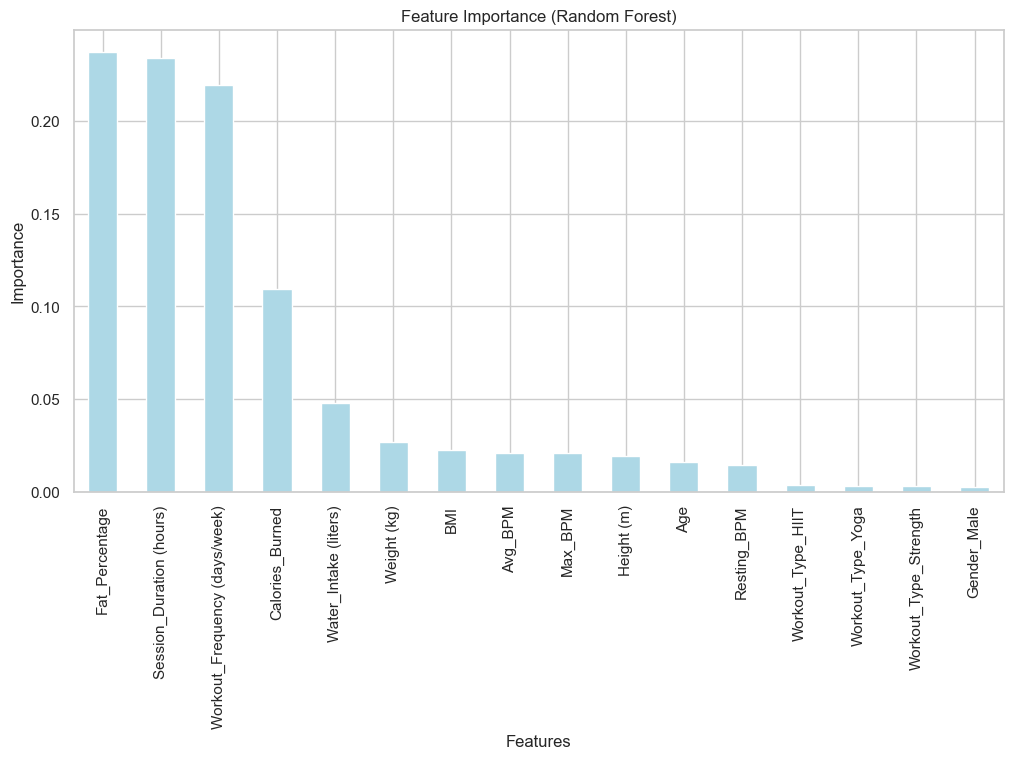

In [18]:
plt.figure(figsize=(12, 6))
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)
feature_importances.plot(kind='bar', title='Feature Importance (Random Forest)', color='lightblue')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

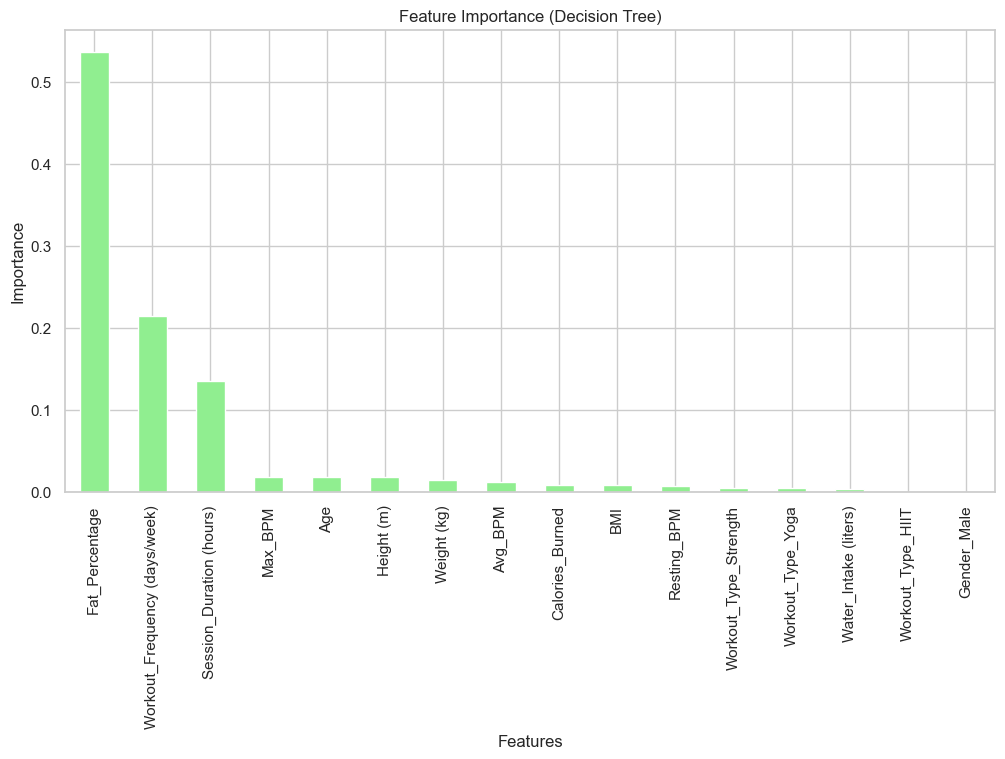

In [19]:
plt.figure(figsize=(12, 6))
feature_importances_dt = pd.Series(dt_model.feature_importances_, index=X.columns).sort_values(ascending=False)
feature_importances_dt.plot(kind='bar', title='Feature Importance (Decision Tree)', color='lightgreen')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

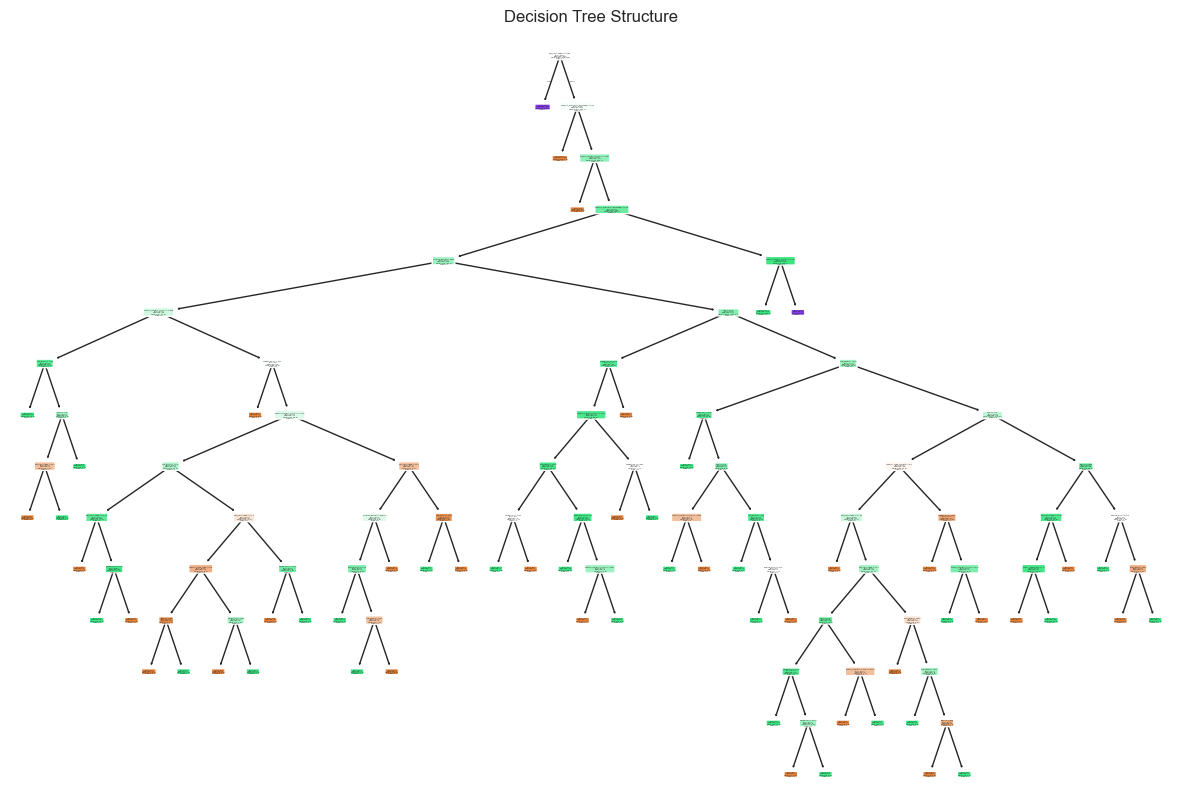

In [20]:
plt.figure(figsize=(15, 10))
plot_tree(
    dt_model,
    feature_names=X.columns,
    class_names=[str(cls) for cls in y.unique()],  
    filled=True,
    rounded=True
)
plt.title('Decision Tree Structure')
plt.show()


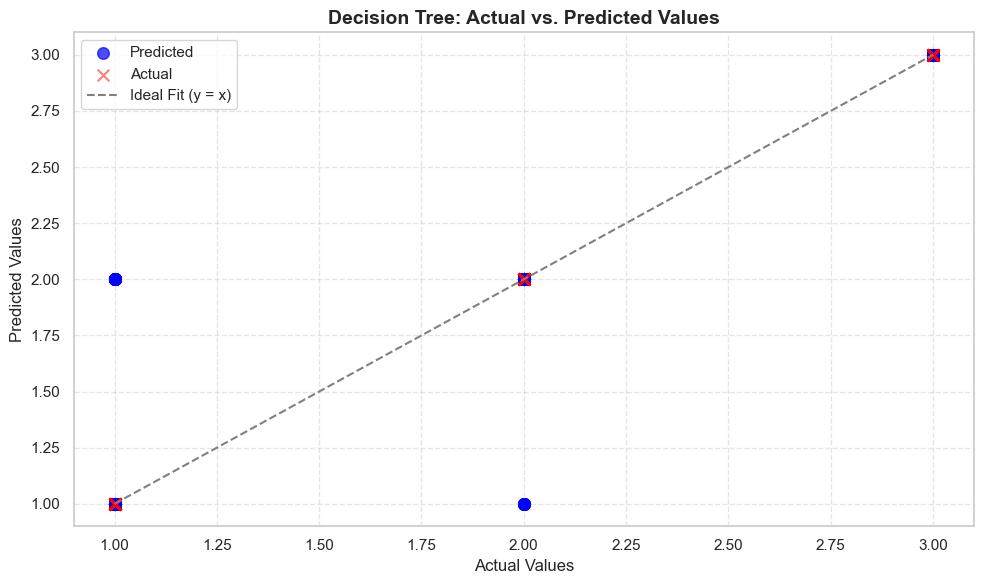

In [21]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_dt, color='blue', label='Predicted', alpha=0.7, s=70, marker='o')
plt.scatter(y_test, y_test, color='red', label='Actual', alpha=0.5, s=70, marker='x')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='gray', linestyle='--', linewidth=1.5, label='Ideal Fit (y = x)')
plt.title('Decision Tree: Actual vs. Predicted Values', fontsize=14, fontweight='bold')
plt.xlabel('Actual Values', fontsize=12)
plt.ylabel('Predicted Values', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5) 
plt.tight_layout()
plt.show()


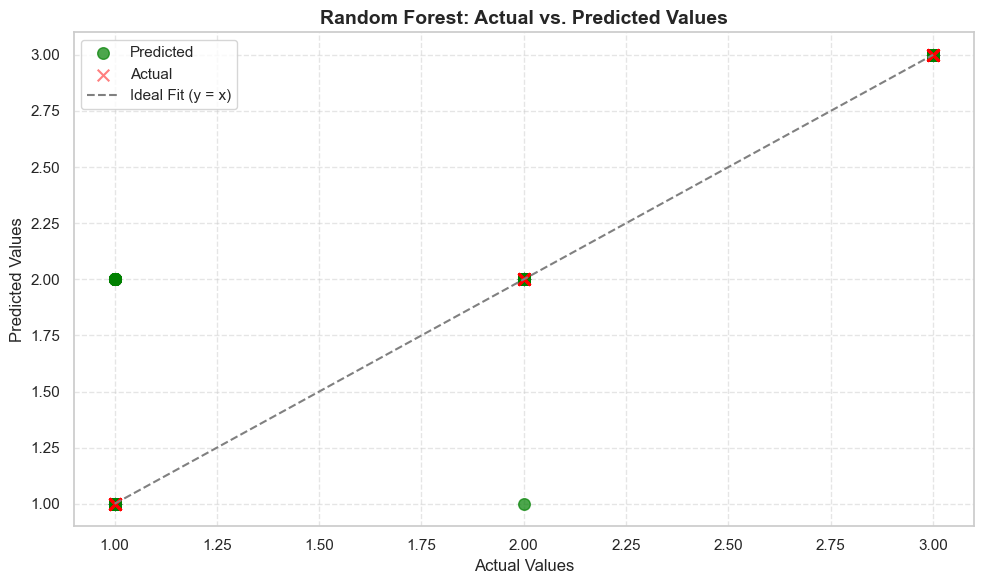

In [32]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, color='green', label='Predicted', alpha=0.7, s=70, marker='o')
plt.scatter(y_test, y_test, color='red', label='Actual', alpha=0.5, s=70, marker='x')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='gray', linestyle='--', linewidth=1.5, label='Ideal Fit (y = x)')
plt.title('Random Forest: Actual vs. Predicted Values', fontsize=14, fontweight='bold')
plt.xlabel('Actual Values', fontsize=12)
plt.ylabel('Predicted Values', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)  
plt.tight_layout()
plt.show()


Text(117.24999999999999, 0.5, 'Actual')

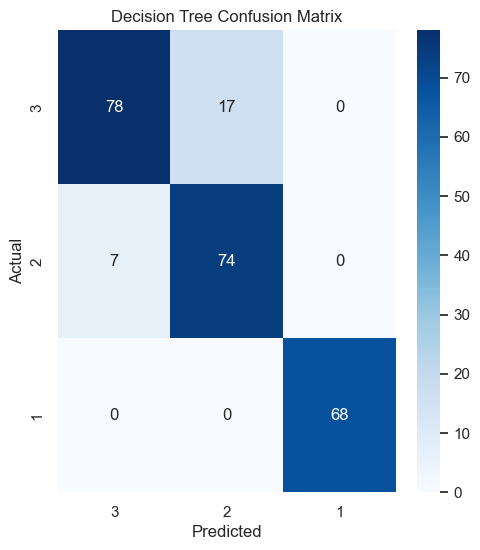

In [23]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.heatmap(conf_matrix_dt, annot=True, fmt='d', cmap='Blues', xticklabels=df['Experience_Level'].unique(), yticklabels=df['Experience_Level'].unique())
plt.title('Decision Tree Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

Text(317.7954545454545, 0.5, 'Actual')

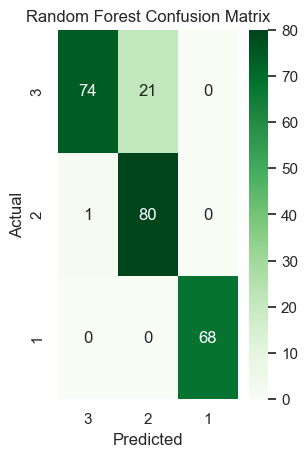

In [24]:
plt.subplot(1, 2, 2)
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Greens', xticklabels=df['Experience_Level'].unique(), yticklabels=df['Experience_Level'].unique())
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [25]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

In [26]:
comparison_df = pd.DataFrame({
    "Actual": y_test.values, 
    "Predicted": y_pred
})

print(comparison_df.head(20))

    Actual  Predicted
0        2          2
1        1          1
2        1          1
3        3          3
4        3          3
5        3          3
6        2          2
7        3          3
8        2          2
9        2          2
10       2          2
11       1          1
12       3          3
13       2          2
14       3          3
15       1          1
16       2          2
17       1          2
18       3          3
19       3          3


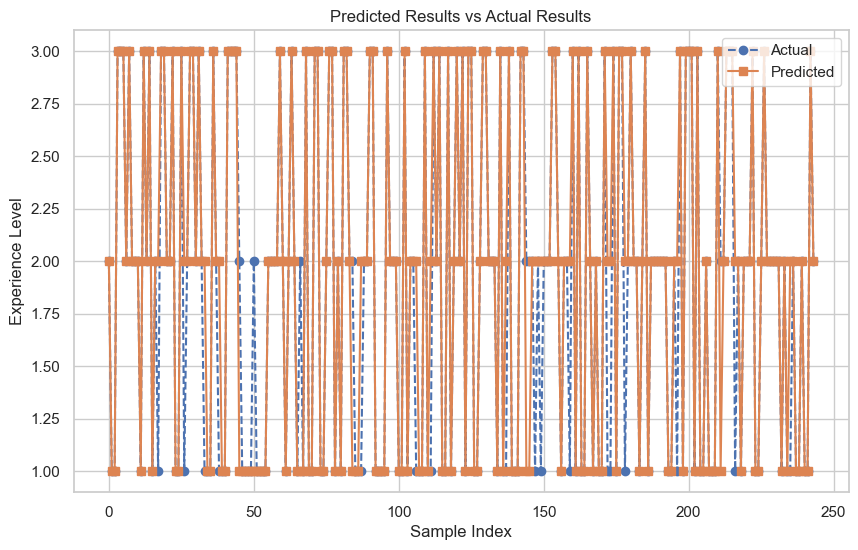

In [27]:
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}).reset_index(drop=True)
plt.figure(figsize=(10, 6))
plt.plot(comparison_df['Actual'], label='Actual', marker='o', linestyle='--')
plt.plot(comparison_df['Predicted'], label='Predicted', marker='s', linestyle='-')
plt.title('Predicted Results vs Actual Results')
plt.xlabel('Sample Index')
plt.ylabel('Experience Level')
plt.legend()
plt.show()

In [28]:
def validate_sample(sample):
    for key, value in sample.items():
        if key in ['Age', 'Weight (kg)', 'Height (m)', 'Max_BPM', 'Avg_BPM', 'Resting_BPM',
                   'Session_Duration (hours)', 'Calories_Burned', 'Fat_Percentage', 'Water_Intake (liters)',
                   'Workout_Frequency (days/week)', 'BMI']:
            if not isinstance(value, (int, float)):
                raise ValueError(f"Feature '{key}' must be numeric, got {value} (type: {type(value)})")

In [29]:
def predict_unseen_sample(sample):
    try:
        validate_sample(sample)

        sample_df = pd.DataFrame([sample])

        for col in X.columns:
            if col not in sample_df:
                sample_df[col] = 0  

        sample_df = sample_df[X.columns]

        print(f"Processed Sample for Prediction:\n{sample_df}")

        prediction = dt_model.predict(sample_df)

        mapping = {1: "Beginner", 2: "Intermediate", 3: "Advanced"}
        return mapping.get(prediction[0], "Unknown")
    except Exception as e:
        return f"Error in prediction: {str(e)}"

In [30]:
unseen_sample = {
    'Age': 30,
    'Weight (kg)': 75,
    'Height (m)': 1.80,
    'Max_BPM': 190,
    'Avg_BPM': 110,
    'Resting_BPM': 60,
    'Session_Duration (hours)': 1.0,
    'Calories_Burned': 300,
    'Fat_Percentage': 20,
    'Water_Intake (liters)': 3.0,
    'Workout_Frequency (days/week)': 5,
    'BMI': 23.1,
    'Gender_Male': 1,
    'Workout_Type_HIIT': 1,
    'Workout_Type_Strength': 0,
    'Workout_Type_Yoga': 0
}
predicted_class = predict_unseen_sample(unseen_sample)
print(f"Predicted Class (Valid Input): {predicted_class}")


Processed Sample for Prediction:
   Age  Weight (kg)  Height (m)  Max_BPM  Avg_BPM  Resting_BPM  \
0   30           75         1.8      190      110           60   

   Session_Duration (hours)  Calories_Burned  Fat_Percentage  \
0                       1.0              300              20   

   Water_Intake (liters)  Workout_Frequency (days/week)   BMI  Gender_Male  \
0                    3.0                              5  23.1            1   

   Workout_Type_HIIT  Workout_Type_Strength  Workout_Type_Yoga  
0                  1                      0                  0  
Predicted Class (Valid Input): Intermediate
